## Import libraries and data 

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

from gensim.models import Word2Vec
# visualization 
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [60]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Preprocessing the data 

In [61]:
df['Maker_Model'] = df['Make'] + " " + df['Model']

In [62]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
df1.head()

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series


In [63]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [64]:
df2[:3].values

array(['premium unleaded (required),MANUAL,rear wheel drive,Factory Tuner,Luxury,High-Performance,Compact,Coupe,BMW 1 Series M',
       'premium unleaded (required),MANUAL,rear wheel drive,Luxury,Performance,Compact,Convertible,BMW 1 Series',
       'premium unleaded (required),MANUAL,rear wheel drive,Luxury,High-Performance,Compact,Coupe,BMW 1 Series'],
      dtype=object)

In [65]:
df_clean = pd.DataFrame({'clean': df2})

In [66]:
df_clean.head()

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."


In [67]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]

In [68]:
sent[0]

['premium unleaded (required)',
 'MANUAL',
 'rear wheel drive',
 'Factory Tuner',
 'Luxury',
 'High-Performance',
 'Compact',
 'Coupe',
 'BMW 1 Series M']

##  Genism word2vec Model Training

In [69]:
import gensim
from gensim.models import Word2Vec

### parameters of Word2Vec

**window** The maximum distance between a target word and words around the target word. The default window is 5.

**min_count** The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

The training algorithm, either **CBOW(0)** or **skip gram(1)**. The default training algorithm is CBOW.

In [70]:
model = gensim.models.Word2Vec(sent, min_count=1,workers=3, window =3, sg = 1)

In [71]:
#After training the word2vec model, we can obtain the word embedding directly from the training model as following.
model.wv['Toyota Camry']

array([-0.0580277 , -0.03495314,  0.07552615,  0.15499222, -0.0417516 ,
       -0.03348416,  0.09793164,  0.07457665, -0.16534953, -0.11868646,
        0.03011615, -0.05671578,  0.02491067,  0.17272812,  0.1231049 ,
        0.04827915,  0.13873327,  0.01385264, -0.10855266, -0.1956007 ,
        0.03717336,  0.11352638,  0.12708694, -0.0665616 , -0.00173077,
        0.14264646, -0.1916785 ,  0.09156679, -0.02878528,  0.10089656,
        0.15813781, -0.02077474,  0.09317044, -0.07619632, -0.13442607,
        0.02564894, -0.04480292, -0.03845438, -0.12734006, -0.03818898,
        0.09376859,  0.00181048, -0.01131373,  0.01491171,  0.07349576,
       -0.08313759, -0.11510709, -0.15292361,  0.11201458,  0.05216945,
        0.023315  , -0.06494918, -0.04819654, -0.06479036, -0.02992045,
        0.04642912,  0.01402436,  0.04464141,  0.08876336, -0.01375083,
       -0.0259017 , -0.0409792 ,  0.19741654,  0.09055337, -0.12595014,
        0.16170537, -0.01880644,  0.06587722, -0.14031811,  0.08

In [72]:
#Euclidian similarity between Porsche 718 Cayman and Nissan Van.
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.94173825

In [73]:
#set of the most similar make models for a given make model based on the Euclidean distance.
model.wv.most_similar ('Porsche 718 Cayman')[:5]

[('Maserati Spyder', 0.9842405915260315),
 ('Porsche Boxster', 0.9840015769004822),
 ('Maybach 62', 0.9818008542060852),
 ('Ferrari FF', 0.9811633825302124),
 ('Bentley Continental', 0.9811215996742249)]

## Cosine similarity

In [80]:
def cosine_similarity(model,word,target_list , num):
    cosine_dict = {}
    word_list = []
    a = model.wv[word]
    for item in target_list:
        if item != word:
            b = model.wv[item]
            cos_sim = np.dot(a,b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort = sorted(cosine_dict.items() , key = lambda dist : dist[1], reverse = True)
    for item in dist_sort:
        word_list.append((item[0],item[1]))
    return word_list[0:num]


In [81]:
# only get the unique Maker_Model
Maker_Model = list(df.Maker_Model.unique()) 
Maker_Model[0:4]

['BMW 1 Series M', 'BMW 1 Series', 'Audi 100', 'FIAT 124 Spider']

In [82]:
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_similarity(model,'Mercedes-Benz SLK-Class',Maker_Model,15)

[('Chrysler Crossfire', 0.9930671),
 ('Ford Shelby GT500', 0.99099255),
 ('BMW M6', 0.9898685),
 ('Porsche Boxster', 0.9898387),
 ('Ford Shelby GT350', 0.98977757),
 ('Mercedes-Benz AMG GT', 0.9894209),
 ('Nissan GT-R', 0.9891913),
 ('Porsche Cayman', 0.98901457),
 ('Honda S2000', 0.98849964),
 ('Audi S3', 0.9881958),
 ('Pontiac Solstice', 0.9881193),
 ('Cadillac ATS-V', 0.98781925),
 ('Subaru BRZ', 0.98764193),
 ('Ford Mustang SVT Cobra', 0.9875342),
 ('BMW M', 0.9874967)]

## T-SNE Plot

It’s hard to visualize the word embedding directly, for they usually has more than 3 dimensions. T-SNE is an useful tool to visualize high-dimensional data by reducing dimensional space while keeping relative pairwise distance between points


In [91]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word)

    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<IPython.core.display.Javascript object>


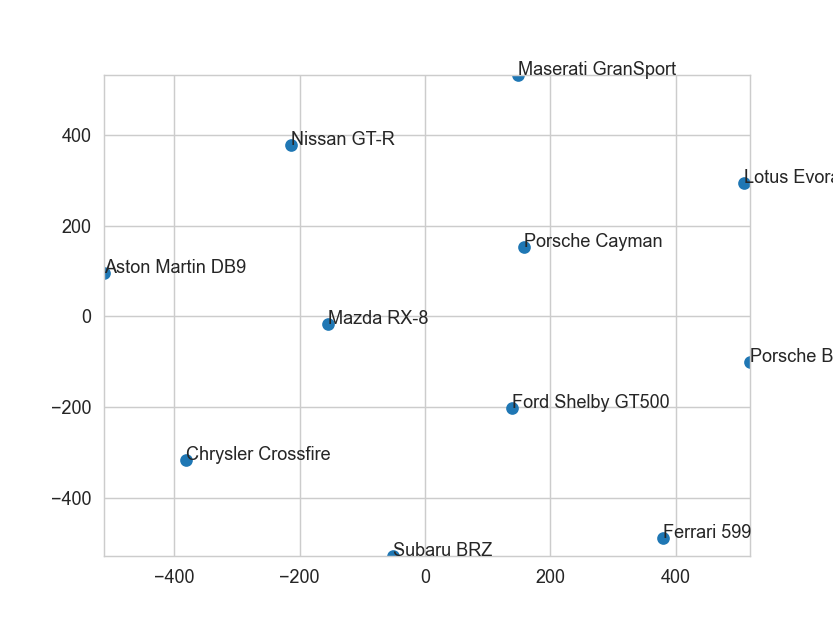

In [95]:
display_closestwords_tsnescatterplot(model, 'Porsche Cayman', 100)